In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston

from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

```
CRIM: 자치시(town) 별 1인당 범죄율
ZN: 25,000 평방피트를 초과하는 거주지역의 비율
INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
CHAS:찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX:10ppm 당 농축 일산화질소
RM: 주택 1가구당 평균 방의 개수
AGE:1940년 이전에 건축된 소유주택의 비율
DIS:  5개의 보스턴 직업센터까지의 접근성 지수
RAD: 방사형 도로까지의 접근성 지수 
TAX: 10,000 달러 당 재산세율
PTRATIO: 자치시(town)별 학생/교사 비율
B: 1000(Bk — 0.63)², 여기서 Bk는 자치시별 흑인의 비율을 말함.
LSTAT: 모집단의 하위계층의 비율(%)
MEDV: 본인 소유의 주택가격(중앙값) (단위: $1,000)
```

In [2]:
boston = load_boston()
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data['MEDV'] = boston.target

In [3]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**데이터 상관관계 분석**

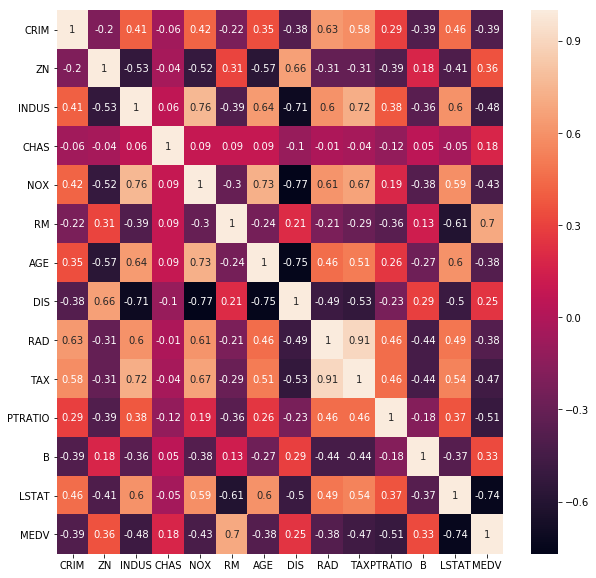

In [4]:
correlation_matrix = boston_data.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,  ax=ax)
plt.show()

상관관계 분석 결과 LSTAT와 음의 상관관계, RM과 양의 상관관계가 있음을 알 수 있습니다.

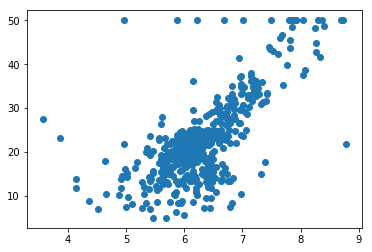

In [5]:
# 방의 수와 집값은 어떤 관계인가
plt.scatter(boston_data["RM"], boston_data["MEDV"], marker='o')

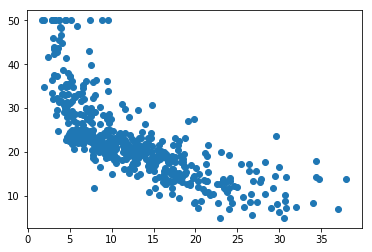

In [6]:
# 하위계층과 집값은 어떤 관계를 갖는가
plt.scatter(boston_data["LSTAT"], boston_data["MEDV"], marker='o')

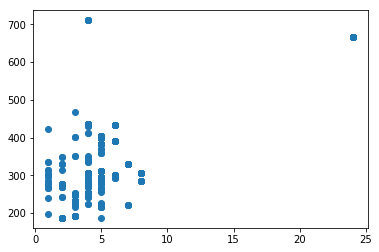

In [7]:
# 재산세율과 도로 접근성
plt.scatter(boston_data["RAD"], boston_data["TAX"], marker='o')

(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

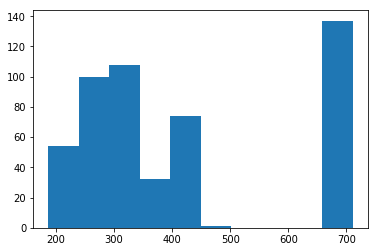

In [8]:
# 재산세율이 높을수록(재산이 많다) 도로와 접근성이 높다. 
plt.hist(boston_data["TAX"])

RM이 올라갈수록 가격이 증가함을 알 수 있으며, LSTAT가 증가함에 따라 가격이 감소하는 경향이 있다. 

**예측 모델**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(boston_data[boston_data.columns[:-1]], 
                                                    boston_data[boston_data.columns[-1]], test_size=0.3)

In [10]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


**선형회귀**

In [17]:
LR = LinearRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_train) 
train_score = metrics.r2_score(y_train, y_predict)
y_predict = LR.predict(x_test) 
test_score = metrics.r2_score(y_test, y_predict)
print('train : ',train_score, '\ntest : ',test_score) 

train :  0.7205960047590705 
test :  0.7705785941626009


**선형 회귀로는 높은 정확도를 볼 수 없으므로 다항회귀로 풀는 것이 적합하다**

In [18]:
poly = PolynomialFeatures(degree=2)
poly.fit(boston_data[boston_data.columns[:-1]])

data = poly.transform(boston_data[boston_data.columns[:-1]])
data_target =  boston_data[boston_data.columns[-1]]

x_train, x_test, y_train, y_test = model_selection.train_test_split(data, data_target, test_size=0.3)

FR = LinearRegression()
FR.fit(x_train, y_train)

y_predict = FR.predict(x_train) 
train_score = metrics.r2_score(y_train, y_predict)
y_predict = FR.predict(x_test) 
test_score = metrics.r2_score(y_test, y_predict)
print('train : ',train_score, '\ntest : ',test_score) 

train :  0.9460015205015837 
test :  0.8241740395784521


* 고려해야 할 점은 , 특정 변수 몇개가 서로 강한 상관관계를 가지고 있어 회귀분석할 때, 다중공선성을 주의해야한다.  

'RM', 'RAD', 'TAX','LSTAT'